In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings("ignore")

In [194]:
train_data = pd.read_csv("ML_train.csv")
test_data = pd.read_csv("ML_test.csv")

In [195]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [196]:
rows, columns = train_data.shape
print('Rows = ' , rows, 'Columns =' , columns )

Rows =  4209 Columns = 378


In [197]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [198]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4205.960798,2437.608688,0.00,2095.00,4220.00,6314.00,8417.00
y,4209.0,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X10,4209.0,0.013305,0.114590,0.00,0.00,0.00,0.00,1.00
X11,4209.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
X12,4209.0,0.075077,0.263547,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...
X380,4209.0,0.008078,0.089524,0.00,0.00,0.00,0.00,1.00
X382,4209.0,0.007603,0.086872,0.00,0.00,0.00,0.00,1.00
X383,4209.0,0.001663,0.040752,0.00,0.00,0.00,0.00,1.00
X384,4209.0,0.000475,0.021796,0.00,0.00,0.00,0.00,1.00


In [199]:
duplicate = train_data[train_data.duplicated(keep = 'last')]
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [ID, y, X0, X1, X2, X3, X4, X5, X6, X8, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100, X101, ...]
Index: []

[0 rows x 378 columns]


# 1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [200]:
variance_0= train_data.var() == 0
variance_0

ID      False
y       False
X10     False
X11      True
X12     False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 370, dtype: bool

In [201]:
variance = variance_0[variance_0].index.to_list()
variance

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [202]:
train_data.drop(variance, axis = 1,inplace=True)
train_data.dtypes.value_counts()

int64      357
object       8
float64      1
dtype: int64

In [203]:
test_data.drop(variance, axis = 1,inplace=True)
test_data.dtypes.value_counts()

int64     357
object      8
dtype: int64

# 2.Check for null and unique values for test and train sets.

In [204]:
train_data.isnull().any().any()

False

In [205]:
test_data.isnull().any().any()

False

In [206]:
train_data.nunique().sort_values(ascending=False)

ID      4209
y       2545
X0        47
X2        44
X5        29
        ... 
X131       2
X130       2
X129       2
X128       2
X385       2
Length: 366, dtype: int64

In [207]:
test_data.nunique().sort_values(ascending=False)

ID      4209
X0        49
X2        45
X5        32
X1        27
        ... 
X369       1
X257       1
X258       1
X296       1
X295       1
Length: 365, dtype: int64

# 3. Apply label encoder.

In [208]:
cols = train_data.columns
num_cols = train_data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['X6', 'X5', 'X1', 'X2', 'X4', 'X3', 'X8', 'X0']

In [209]:
from sklearn.preprocessing import LabelEncoder

class LabelEncoderExt(object):
    def __init__(self):
             
            self.label_encoder = LabelEncoder()
        
    def fit(self, data_list):
     
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)
    
    

In [210]:
for c in cat_cols:
    label_encoder = LabelEncoderExt()
    label_encoder.fit(train_data[c])
    train_data[c] =label_encoder.transform(train_data[c])
    test_data[c]=label_encoder.transform(test_data[c])

In [211]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,33,24,18,1,4,25,10,15,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,33,22,20,5,4,29,12,15,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,21,25,35,3,4,28,10,24,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,21,22,35,6,4,28,12,5,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,21,24,35,6,4,13,4,14,...,0,0,0,0,0,0,0,0,0,0


# 4. Perform dimensionality reduction.

In [212]:
y_train = train_data['y']
del train_data['y']

del train_data['ID']

test_data_ID=test_data['ID']
del test_data['ID']

In [213]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=8)
pca.fit(train_data)
x_pca = pca.transform(train_data)
x_pca.shape

(4209, 8)

In [214]:
vr=pca.explained_variance_ratio_

In [215]:
vr.shape

(8,)

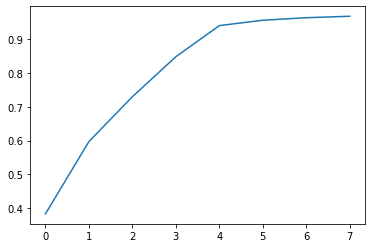

In [216]:
cum_vr=np.cumsum(vr)
plt.plot(cum_vr)

Aove 90% data effected by 05 Components so, will be considered 05 components

In [217]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=5)
pca.fit(train_data)
x_train_pca = pca.transform(train_data)
x_train_pca.shape

(4209, 5)

In [218]:
x_test_pca = pca.transform(test_data)
x_test_pca.shape

(4209, 5)

# 5. Predict your test_df values using XGBoost.

In [219]:
import xgboost as xg
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

x_train_f, x_valid_f, y_train_f, y_valid_f = train_test_split(x_train_pca, y_train, test_size=0.3,random_state=123)

In [221]:
d_train = xg.DMatrix(x_train_f, label=y_train_f)
d_valid = xg.DMatrix(x_valid_f, label=y_valid_f)
d_test = xg.DMatrix(x_test_pca)

In [222]:
param = {'objective': 'reg:linear', 'eta': 0.03, 'max_depth': 4}
xgb_r = xg.train(params=param,dtrain = d_train, num_boost_round = 10)
y_train_pred = xgb_r.predict(d_train)
y_valid_pred = xgb_r.predict(d_valid)
y_test_pred = xgb_r.predict(d_test)

[05:11:50] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [223]:
R_square_train = r2_score(y_train_pred, y_train_f) 
R_square_valid = r2_score(y_valid_pred, y_valid_f) 
print('R^2 train:', R_square_train) 
print('R^2 valid set:', R_square_valid) 

R^2 train: -2447.975955655754
R^2 valid set: -2439.5525358364634


In [224]:
# Train set
rmse_train = np.sqrt(MSE(y_train_f, y_train_pred))
print("RMSE of train data: % f" %(rmse_train))

#Valid set
rmse_valid = np.sqrt(MSE(y_valid_f, y_valid_pred))
print("RMSE of valid set data : % f" %(rmse_valid))

RMSE of train data:  74.899321
RMSE of valid set data :  74.824379


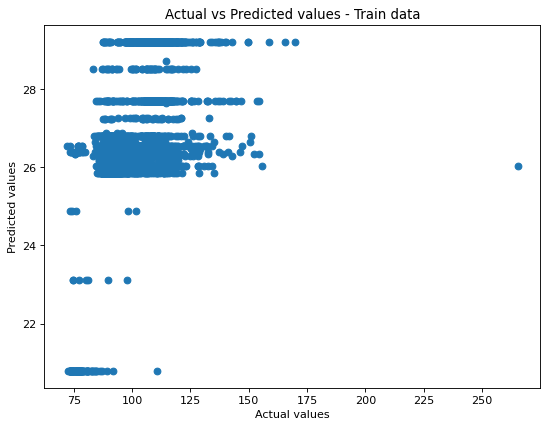

In [225]:
from matplotlib.pyplot import figure
# Actual vs Predicted on Train data
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train_f,y_train_pred)
plt.title("Actual vs Predicted values - Train data")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()